<a href="https://colab.research.google.com/github/jhonatantft/cnn-image-classification/blob/main/cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation

In [1]:
pip install -q tensorflow pillow

Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

Datasets path

In [3]:
datasetPath = 'drive/My Drive/Colab Notebooks/dataset/'

Test dataset path image import

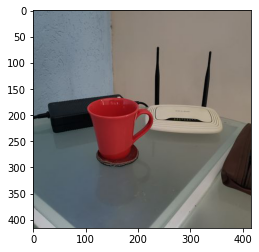

In [4]:
img = image.load_img(datasetPath + 'train/mug/20201014_171021.jpg')
plt.imshow(img)

In [5]:
cv2.imread(datasetPath + '/train/mug/20201014_171021.jpg').shape

(416, 416, 3)

Transform images format to keras format

In [38]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [36]:
train_dataset = train.flow_from_directory(datasetPath + 'train/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory(datasetPath + 'validation/',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 368 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


Model's Layers definition (https://keras.io/guides/sequential_model/)

In [15]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

Model configuration

In [16]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

Start training

In [27]:
model_fit = model.fit(train_dataset,
                      # steps_per_epoch = 1,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
123/123 [==============================] - 52s 425ms/step - loss: 0.4316 - accuracy: 0.8125 - val_loss: 0.5543 - val_accuracy: 0.7966
Epoch 2/30
123/123 [==============================] - 52s 423ms/step - loss: 0.3884 - accuracy: 0.8342 - val_loss: 0.8963 - val_accuracy: 0.6780
Epoch 3/30
123/123 [==============================] - 52s 425ms/step - loss: 0.3405 - accuracy: 0.8478 - val_loss: 0.8807 - val_accuracy: 0.7119
Epoch 4/30
123/123 [==============================] - 52s 426ms/step - loss: 0.3508 - accuracy: 0.8533 - val_loss: 0.6865 - val_accuracy: 0.7458
Epoch 5/30
123/123 [==============================] - 52s 424ms/step - loss: 0.3194 - accuracy: 0.8533 - val_loss: 0.9888 - val_accuracy: 0.6102
Epoch 6/30
123/123 [==============================] - 52s 425ms/step - loss: 0.2997 - accuracy: 0.8750 - val_loss: 0.9761 - val_accuracy: 0.6610
Epoch 7/30
123/123 [==============================] - 53s 428ms/step - loss: 0.2950 - accuracy: 0.8859 - val_loss: 1.0615 - val_ac

Classes indices


In [28]:
validation_dataset.class_indices

{'mug': 0, 'no_mug': 1}

Prediction


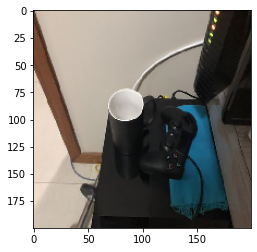

[[0.]]
Tem uma caneca!


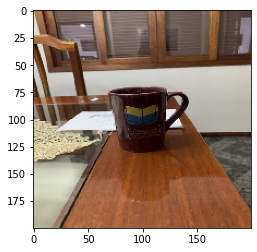

[[0.]]
Tem uma caneca!


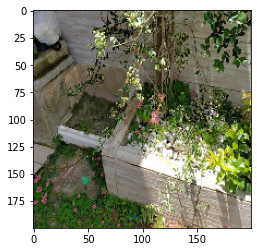

[[1.]]
Não tem caneca!


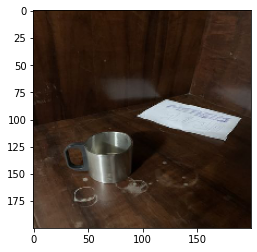

[[0.]]
Tem uma caneca!


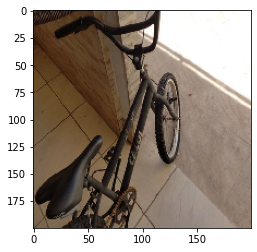

[[1.]]
Não tem caneca!


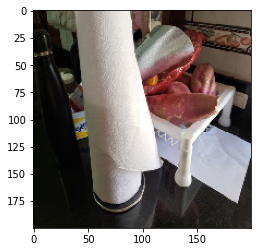

[[1.]]
Não tem caneca!


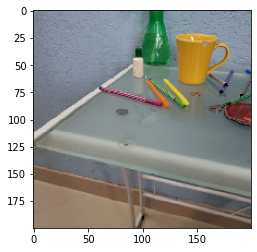

[[0.]]
Tem uma caneca!


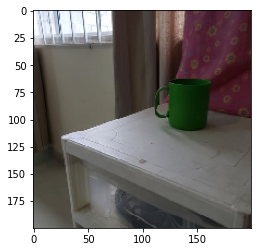

[[0.]]
Tem uma caneca!


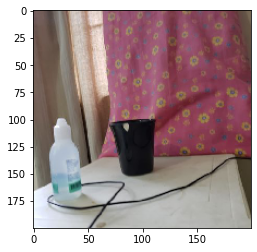

[[0.]]
Tem uma caneca!


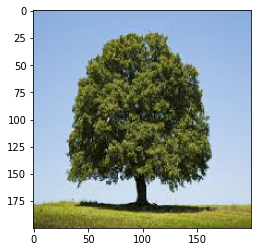

[[1.]]
Não tem caneca!


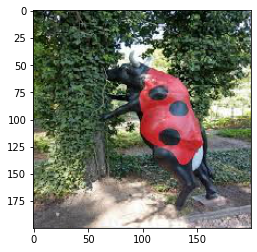

[[1.]]
Não tem caneca!


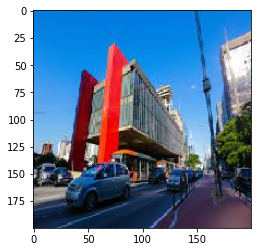

[[1.]]
Não tem caneca!


In [41]:
dir_path = datasetPath + '/test/mug'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i, target_size=(200, 200))
  plt.imshow(img)
  plt.show(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)
  images = np.vstack([x])

  value = model.predict(images)


  print(value)
  if value == 0:
    print('Tem uma caneca!')
  else:
    print('Não tem caneca!')